# Dataset Trentino
Registrazione delle misure recuperate dal database X.

La procedura si articola nei seguenti passaggi:
1. [caricamento dei dati grezzi](#caricamento-da-frammenti) e uniformazione negli schemi esposti sotto;
1. [primo quality check](#quality-check): controllo errori di consistenza nella singola serie e nelle coppie di serie della stessa stazione;
1. [overview disponibilità dati](#overview-disponibilità-dati): plot che mostrano la disponibilità temporale e spaziale di serie;
1. [merging](#merging) del dataset con SCIA.

## Data model
### Metadati
| station_id | station_name | network | state | lon    | lat    | elevation | dataset_id | original_id |
|------------|--------------|---------|-------|--------|--------|-----------|------------|-------------|
| utf8()     | utf8()       | utf8()  | utf8()|double()|double()| double()  | utf8()     | utf8()      |
| pkey       | obs          | obs     | obs   | obs    | obs    | obs       | fkey       | obs         |

I metadati delle stazioni che non rientrano nelle tabelle elencate vanno in una tabella "extra" collegata tramite "station_id".

### Dati
|series_id|date|value|merged|variable|
|---------|----|-----|------|--------|
|utf8()|date()|double()|bool()|utf8()|
| fkey    |obs | obs | obs  | obs    |

Note:
- `merged` indica se il valore in riga è il risultato di un merge.


In [2]:
dataset_id <- "TAA"
state <- "Trentino-Alto Adige"


In [46]:
setwd(fs::path_abs("~/Local_Workspace/TesiMag"))
library(arrow, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)
library(zeallot, warn.conflicts = FALSE)
library(stringr, warn.conflicts = FALSE)
options(repr.plot.width = 9, repr.plot.res = 300)

source(str_glue("notebooks/integrazioni_regionali/trentino/procedures/load_daily.R"))
source(str_glue("notebooks/integrazioni_regionali/trentino/procedures/match_taggers.R"))
source("notebooks/integrazioni_regionali/procedure/common_steps.R")
source("notebooks/integrazioni_regionali/procedure/checkpoint.R")
source("notebooks/integrazioni_regionali/procedure/tools.R")
source("src/database/tools.R")
source("src/load/ITA.R")

first_date <- as.Date("2000-01-01")
last_date <- as.Date("2022-12-31")
state_boundaries <- load.italian_boundaries("state") |> filter(shapeName == state)


In [47]:
load_data_tn()

Table
1084719 rows x 5 columns
$original_id <string>
$date <date32[day]>
$value <double>
$valid <int32>
$variable <string>

In [45]:
load_data_tn()


Table
1604726 rows x 4 columns
$original_id <string>
$date <date32[day]>
$variable <string>
$value <double>

In [13]:
open_dataset(file.path(path_tn, "aggregated")) |> compute()


Table
802405 rows x 5 columns
$original_id <string>
$date <date32[day]>
$T_MIN <double>
$T_MAX <double>
$any_gross <bool>

In [14]:
read_parquet(file.path(path_tn, "fragments", "data.parquet"))


time,value_TAVG,valid_TAVG,value_TMIN,valid_TMIN,value_TMAX,valid_TMAX,original_id
<dttm>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>
2018-10-10 02:00:00,-0.2,140,NA,255,NA,255,T0066
2018-10-11 02:00:00,-0.4,1,NA,255,NA,255,T0066
2018-10-12 02:00:00,2.1,1,NA,255,NA,255,T0066
2018-10-13 02:00:00,2.5,1,NA,255,NA,255,T0066
2018-10-14 02:00:00,0.4,1,NA,255,NA,255,T0066
2018-10-15 02:00:00,-1.5,1,NA,255,NA,255,T0066
2018-10-16 02:00:00,-0.7,1,NA,255,NA,255,T0066
2018-10-17 02:00:00,1.2,1,NA,255,NA,255,T0066
2018-10-18 02:00:00,1.6,1,NA,255,NA,255,T0066


In [21]:
wanted_col_names <- c("time", "value_TAVG", "valid_TAVG", "value_TMIN", "valid_TMIN", "value_TMAX", "valid_TMAX")
# list.files(file.path(path_tn, "fragments"), pattern=regex("*.zip"), full.names = TRUE)
tab <- vroom::vroom(
    list.files(file.path(path_tn, "fragments"), pattern = "*.zip", full.names = TRUE),
    skip = 4,
    col_names = c(wanted_col_names, "meta"),
    col_select = all_of(wanted_col_names),
    col_types = "cdididic",
    delim = ",",
    id = "fname"
)
# |>
#     mutate(
#         time = as_datetime(time, tz = "CET", format = "%H:%M:%S %d/%m/%Y"),
#         station = str_split_i(fname, "/", -1) |> str_split_i(fixed("."), 1) |> str_to_upper()
#     ) |>
#     select(-fname)


In [22]:
problems()


Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
9,7,8 columns,7 columns,
10,7,8 columns,7 columns,
11,7,8 columns,7 columns,
12,7,8 columns,7 columns,
13,7,8 columns,7 columns,
14,7,8 columns,7 columns,
15,7,8 columns,7 columns,
16,7,8 columns,7 columns,
17,7,8 columns,7 columns,


In [114]:
useful_data <- tab |> select(!ends_with("TAVG")) |> filter(if_any(starts_with("value"), ~ !is.na(.x)))
useful_stations <- useful_data |> 

In [117]:
useful_data |> group_by(station) |> filter

station,n
<chr>,<int>
T0009,6918
T0010,6793
T0014,6821
T0015,8057
T0017,425
T0018,4302
T0021,2839
T0024,7974
T0026,838


In [46]:
summarise_daily()


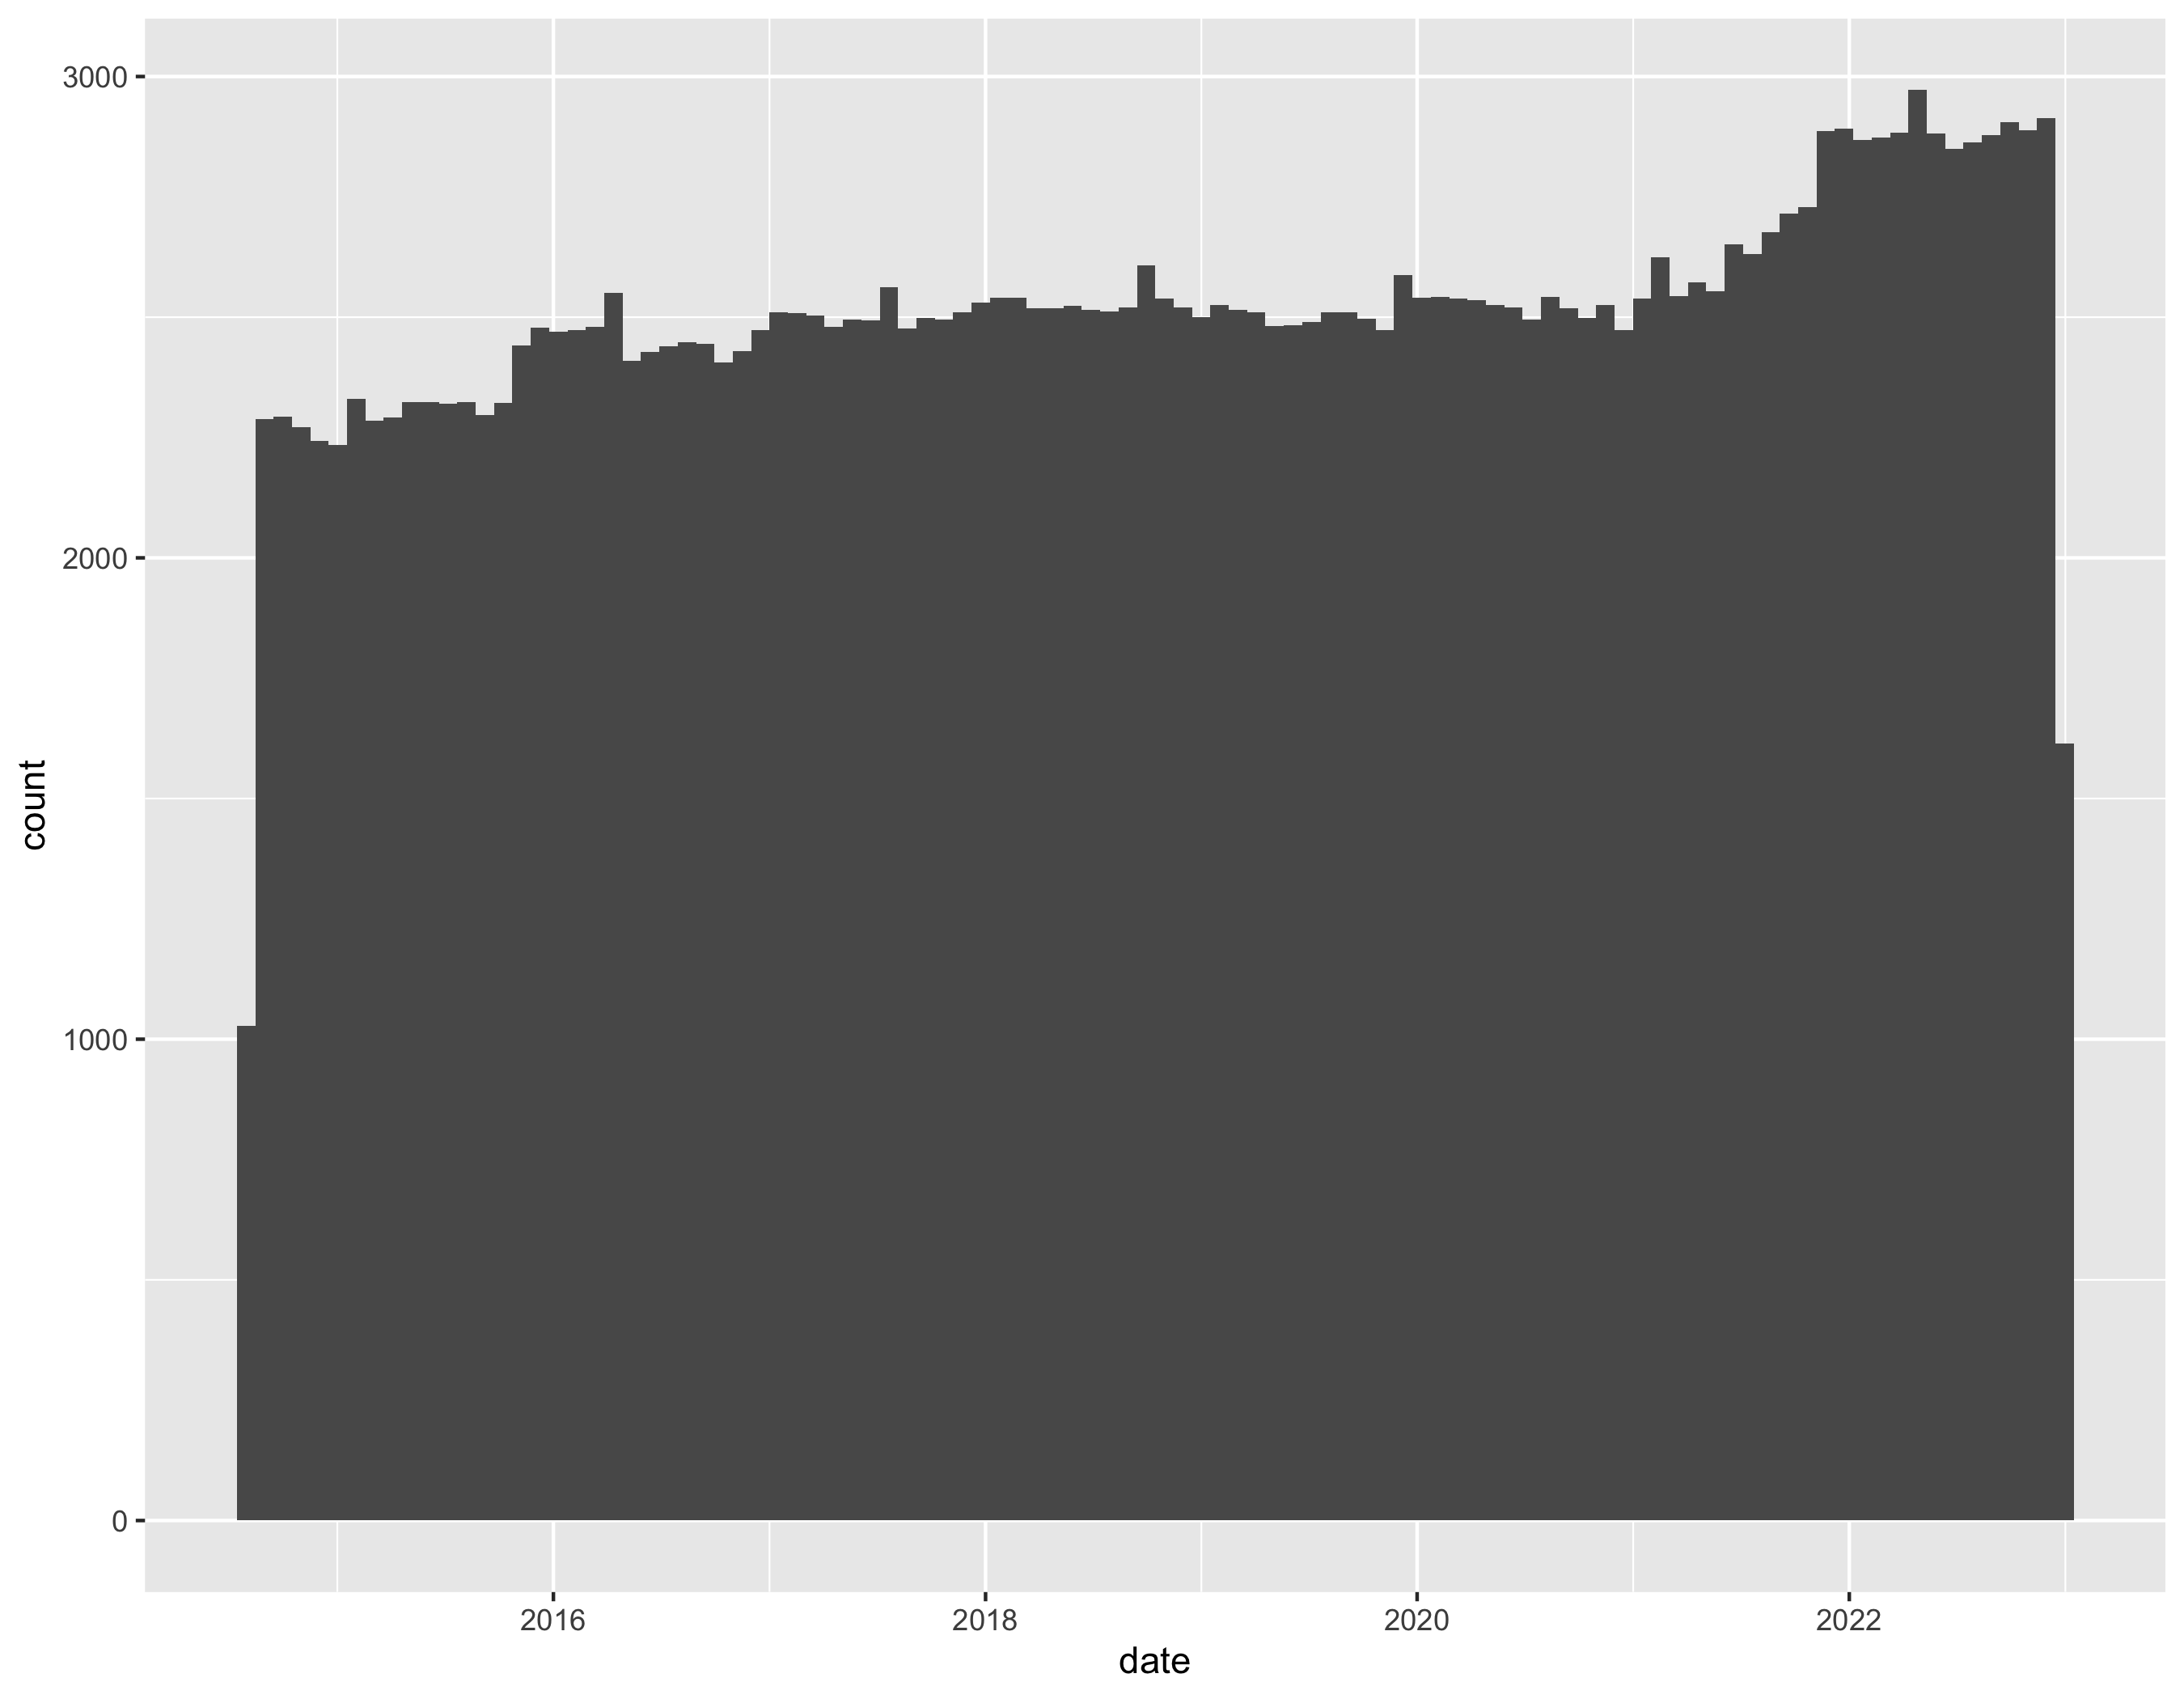

In [52]:
load_data_bz() |>
    collect() |>
    ggplot() +
    geom_histogram(aes(date), bins = 100)


In [31]:
data <- load_data() |> filter(original_id == "45200SF")


In [35]:
data |>
    group_by(date) |>
    tally() |>
    filter(n > 1) |>
    collect()


date,n
<dttm>,<int>
2016-01-01 01:00:00,2
2021-10-31 03:50:00,2
2021-10-31 03:40:00,2
2021-10-31 03:30:00,2
2021-10-31 03:20:00,2
2021-10-31 03:10:00,2
2021-10-31 03:00:00,2
2022-01-01 01:00:00,2
2019-01-01 01:00:00,2


In [17]:
meta <- load_meta_bz()


In [18]:
meta


SCODE,NAME_D,NAME_I,NAME_L,NAME_E,ALT,LONG,LAT,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<POINT [m]>
45200SF,Gsies Pfinnalm,Casies Malga Pfinn,Gsies Pfinnalm,Gsies Pfinnalm,2152,12.2096,46.84170,POINT (744723.4 5192576)
82500WS,Rittnerhorn,Corno del Renon,Rittnerhorn,Rittnerhorn,2260,11.4604,46.61560,POINT (688387.4 5165389)
45100WS,Gsies Regelspitze,Casies Cima Regola,Gsies Regelspitze,Gsies Regelspitze,2747,12.2005,46.85610,POINT (743964.3 5194147)
00700WS,Graun Elferspitze,Curon Cima Undici,Graun Elferspitze,Graun Elferspitze,2926,10.4878,46.77670,POINT (613580.5 5181425)
00390SF,Graun Sch<U+00F6>neben,Curon Belpiano,Graun Sch<U+00F6>neben,Graun Sch<U+00F6>neben,2040,10.4979,46.80640,POINT (614288.6 5184740)
06040WS,Sulden Sch<U+00F6>ntaufspitze,Solda Cima Beltovo,Sulden Sch<U+00F6>ntaufspitze,Sulden Sch<U+00F6>ntaufspitze,3328,10.6286,46.50290,POINT (624958 5151214)
06090SF,Sulden Madritsch,Solda Madriccio,Sulden Madritsch,Sulden Madritsch,2825,10.6144,46.49380,POINT (623889.2 5150181)
35100WS,Jaufenkamm,Cresta del Giovo,Jaufenkamm,Jaufenkamm,2145,11.3184,46.84010,POINT (676779.8 5190005)
50400WS,Prettau Lengspitze,Predoi Pizzo Lungo,Prettau Lengspitze,Prettau Lengspitze,3105,12.1310,47.01590,POINT (737957.2 5211690)


## Caricamento da frammenti
Dati giornalieri come forniti dall'ente, in formato tabella Arrow


In [ ]:
daily_dataset <- load_daily_data.() |> prepare_daily_data(first_date, last_date)
checkpoint_database(daily_dataset$database, dataset_id, "raw")
write_extra_metadata(daily_dataset$extra_meta, dataset_id, provisional = FALSE)
rm(daily_dataset)
gc()


## Quality check
Controllo gross errors, dati ripetuti, T_MIN >= T_MAX, serie intere

In [ ]:
raw_database <- open_checkpoint(dataset_id, "raw")
qc_database <- qc1(raw_database, stop_on_error = TRUE)

checkpoint_database(qc_database, dataset_id, "qc1")
rm(raw_database)
rm(qc_database)
gc()


## Overview disponibilità dati
Grafici che mostrano la disponibilità di serie mese per mese e sul territorio

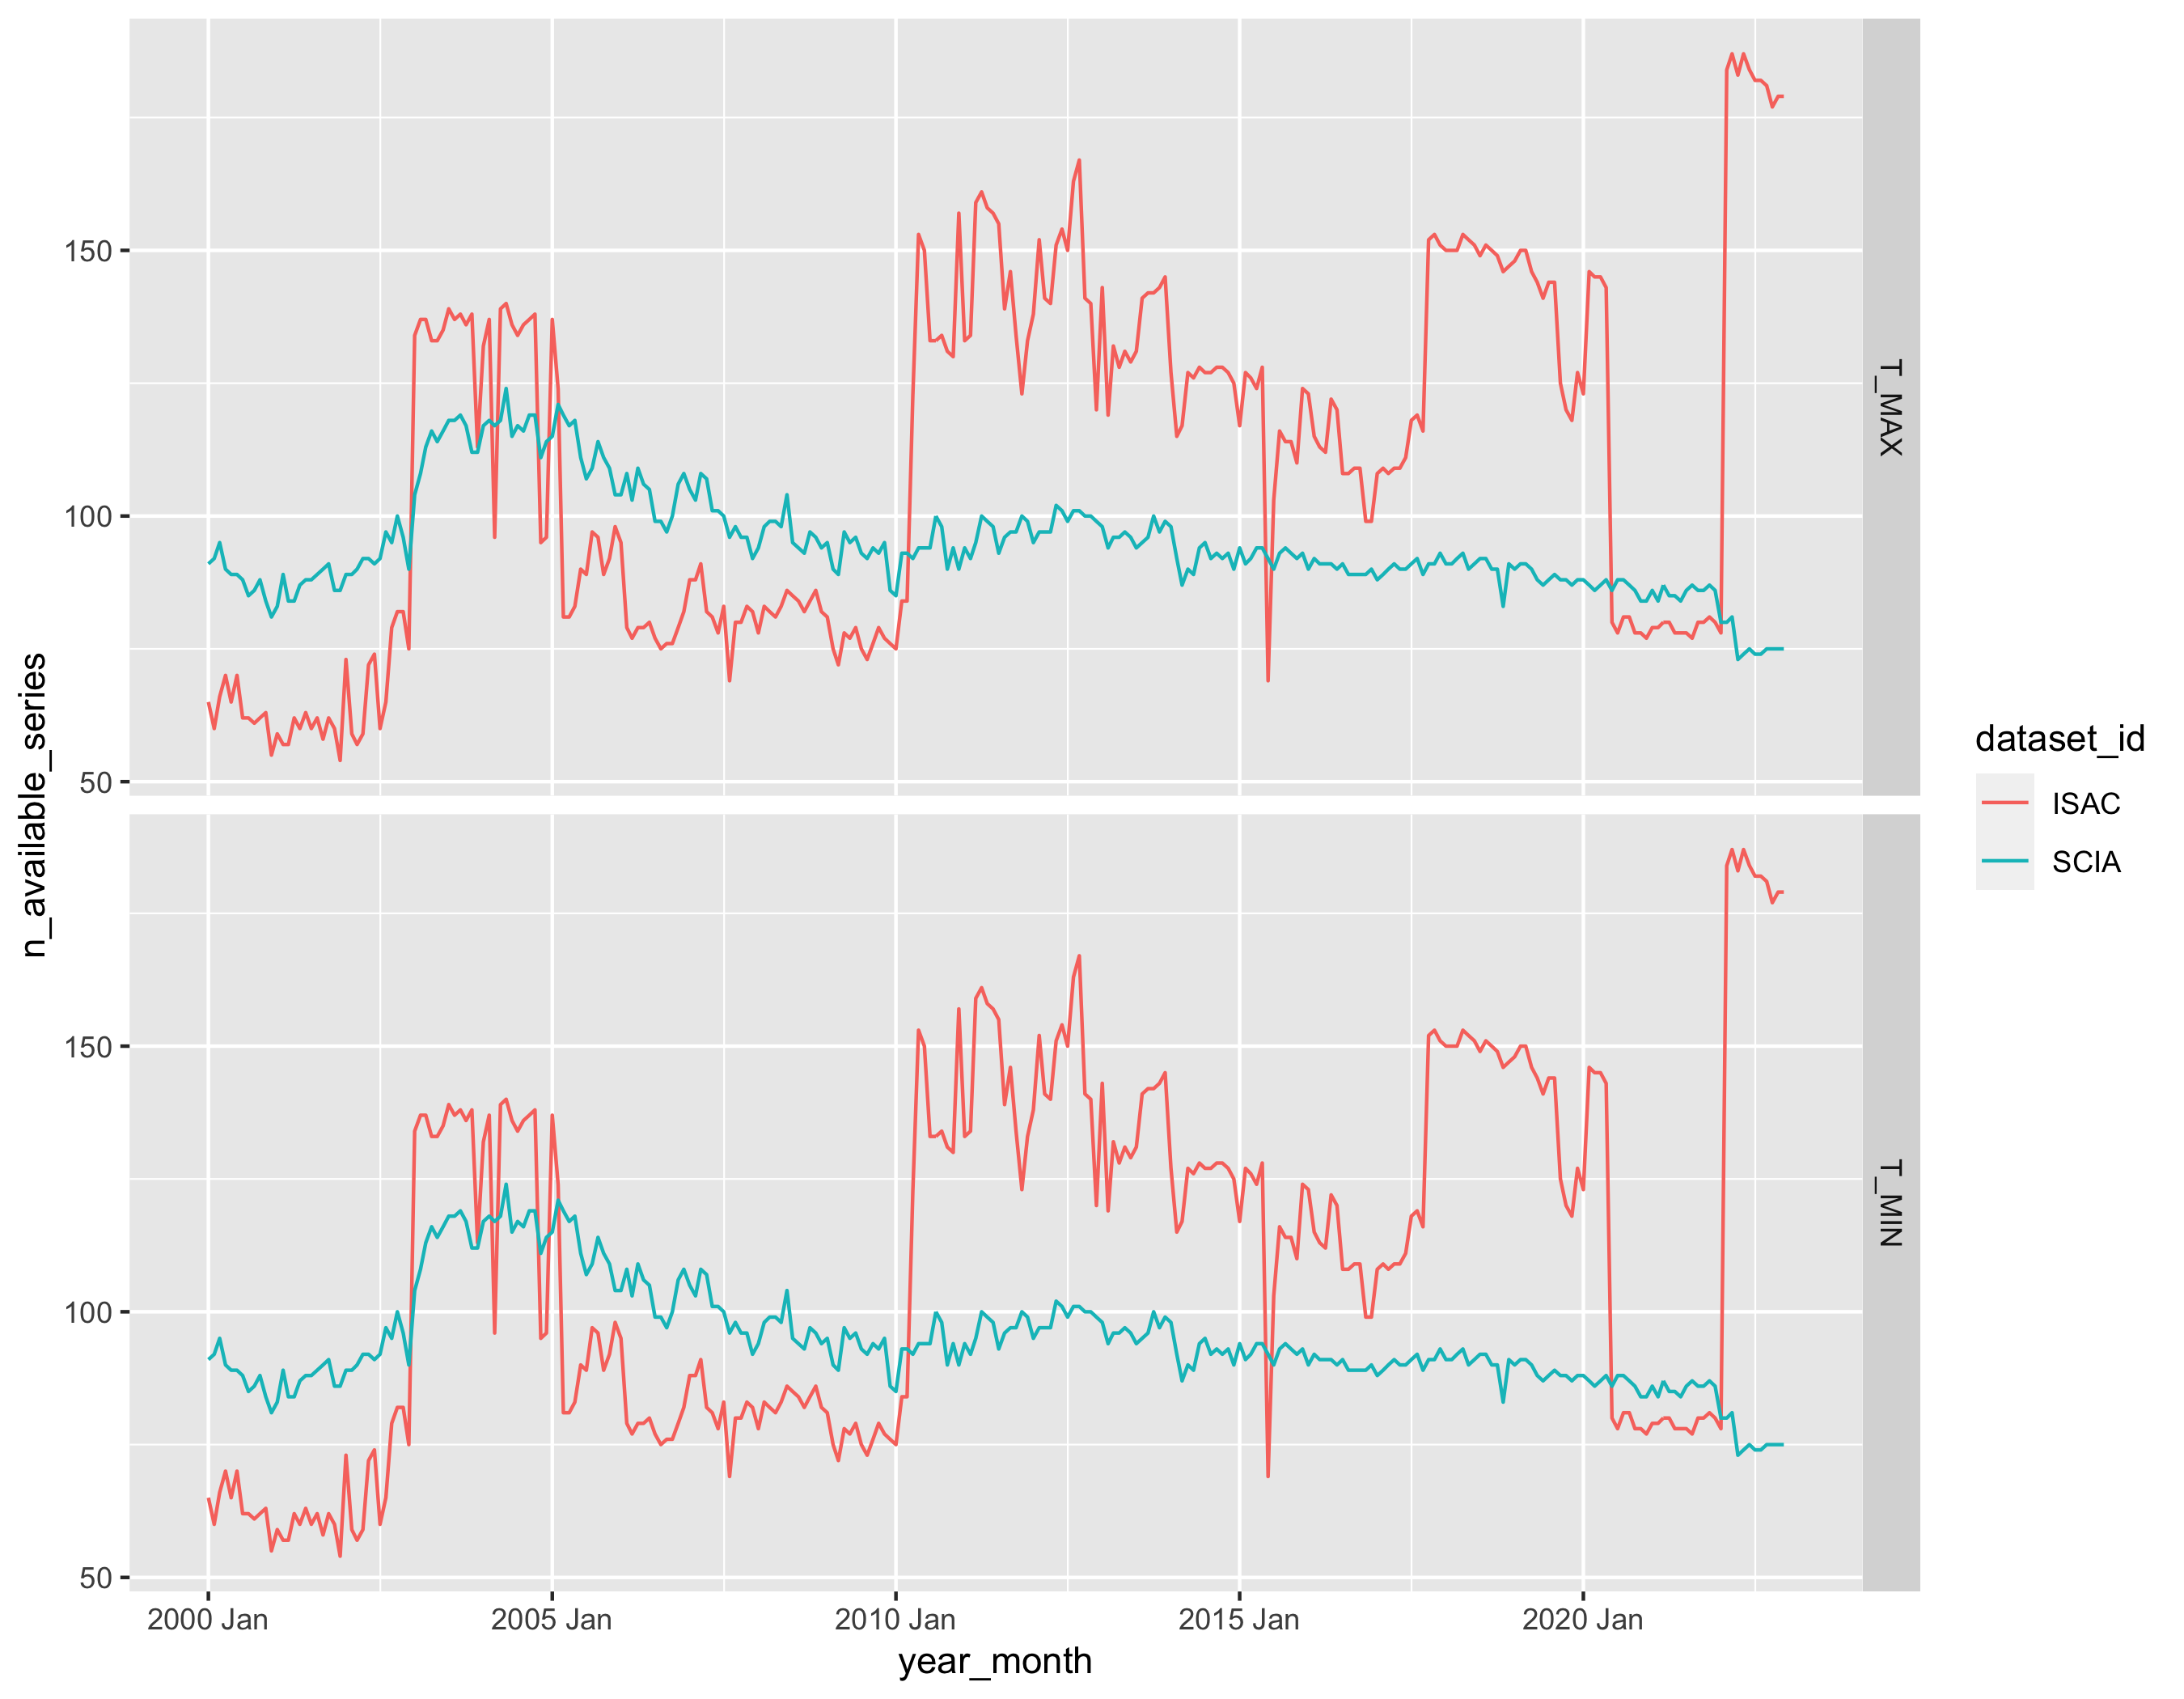

In [4]:
qc_database <- concat_databases(
    open_checkpoint("SCIA", "qc1") |> filter_checkpoint_inside(state_boundaries),
    open_checkpoint("ISAC", "qc1") |> filter_checkpoint_inside(state_boundaries)
)
c(p, ymonthly_avail) %<-% ymonthly_availabilities(qc_database,
    against = NULL,
    start_date = first_date,
    end_date = last_date
)
p


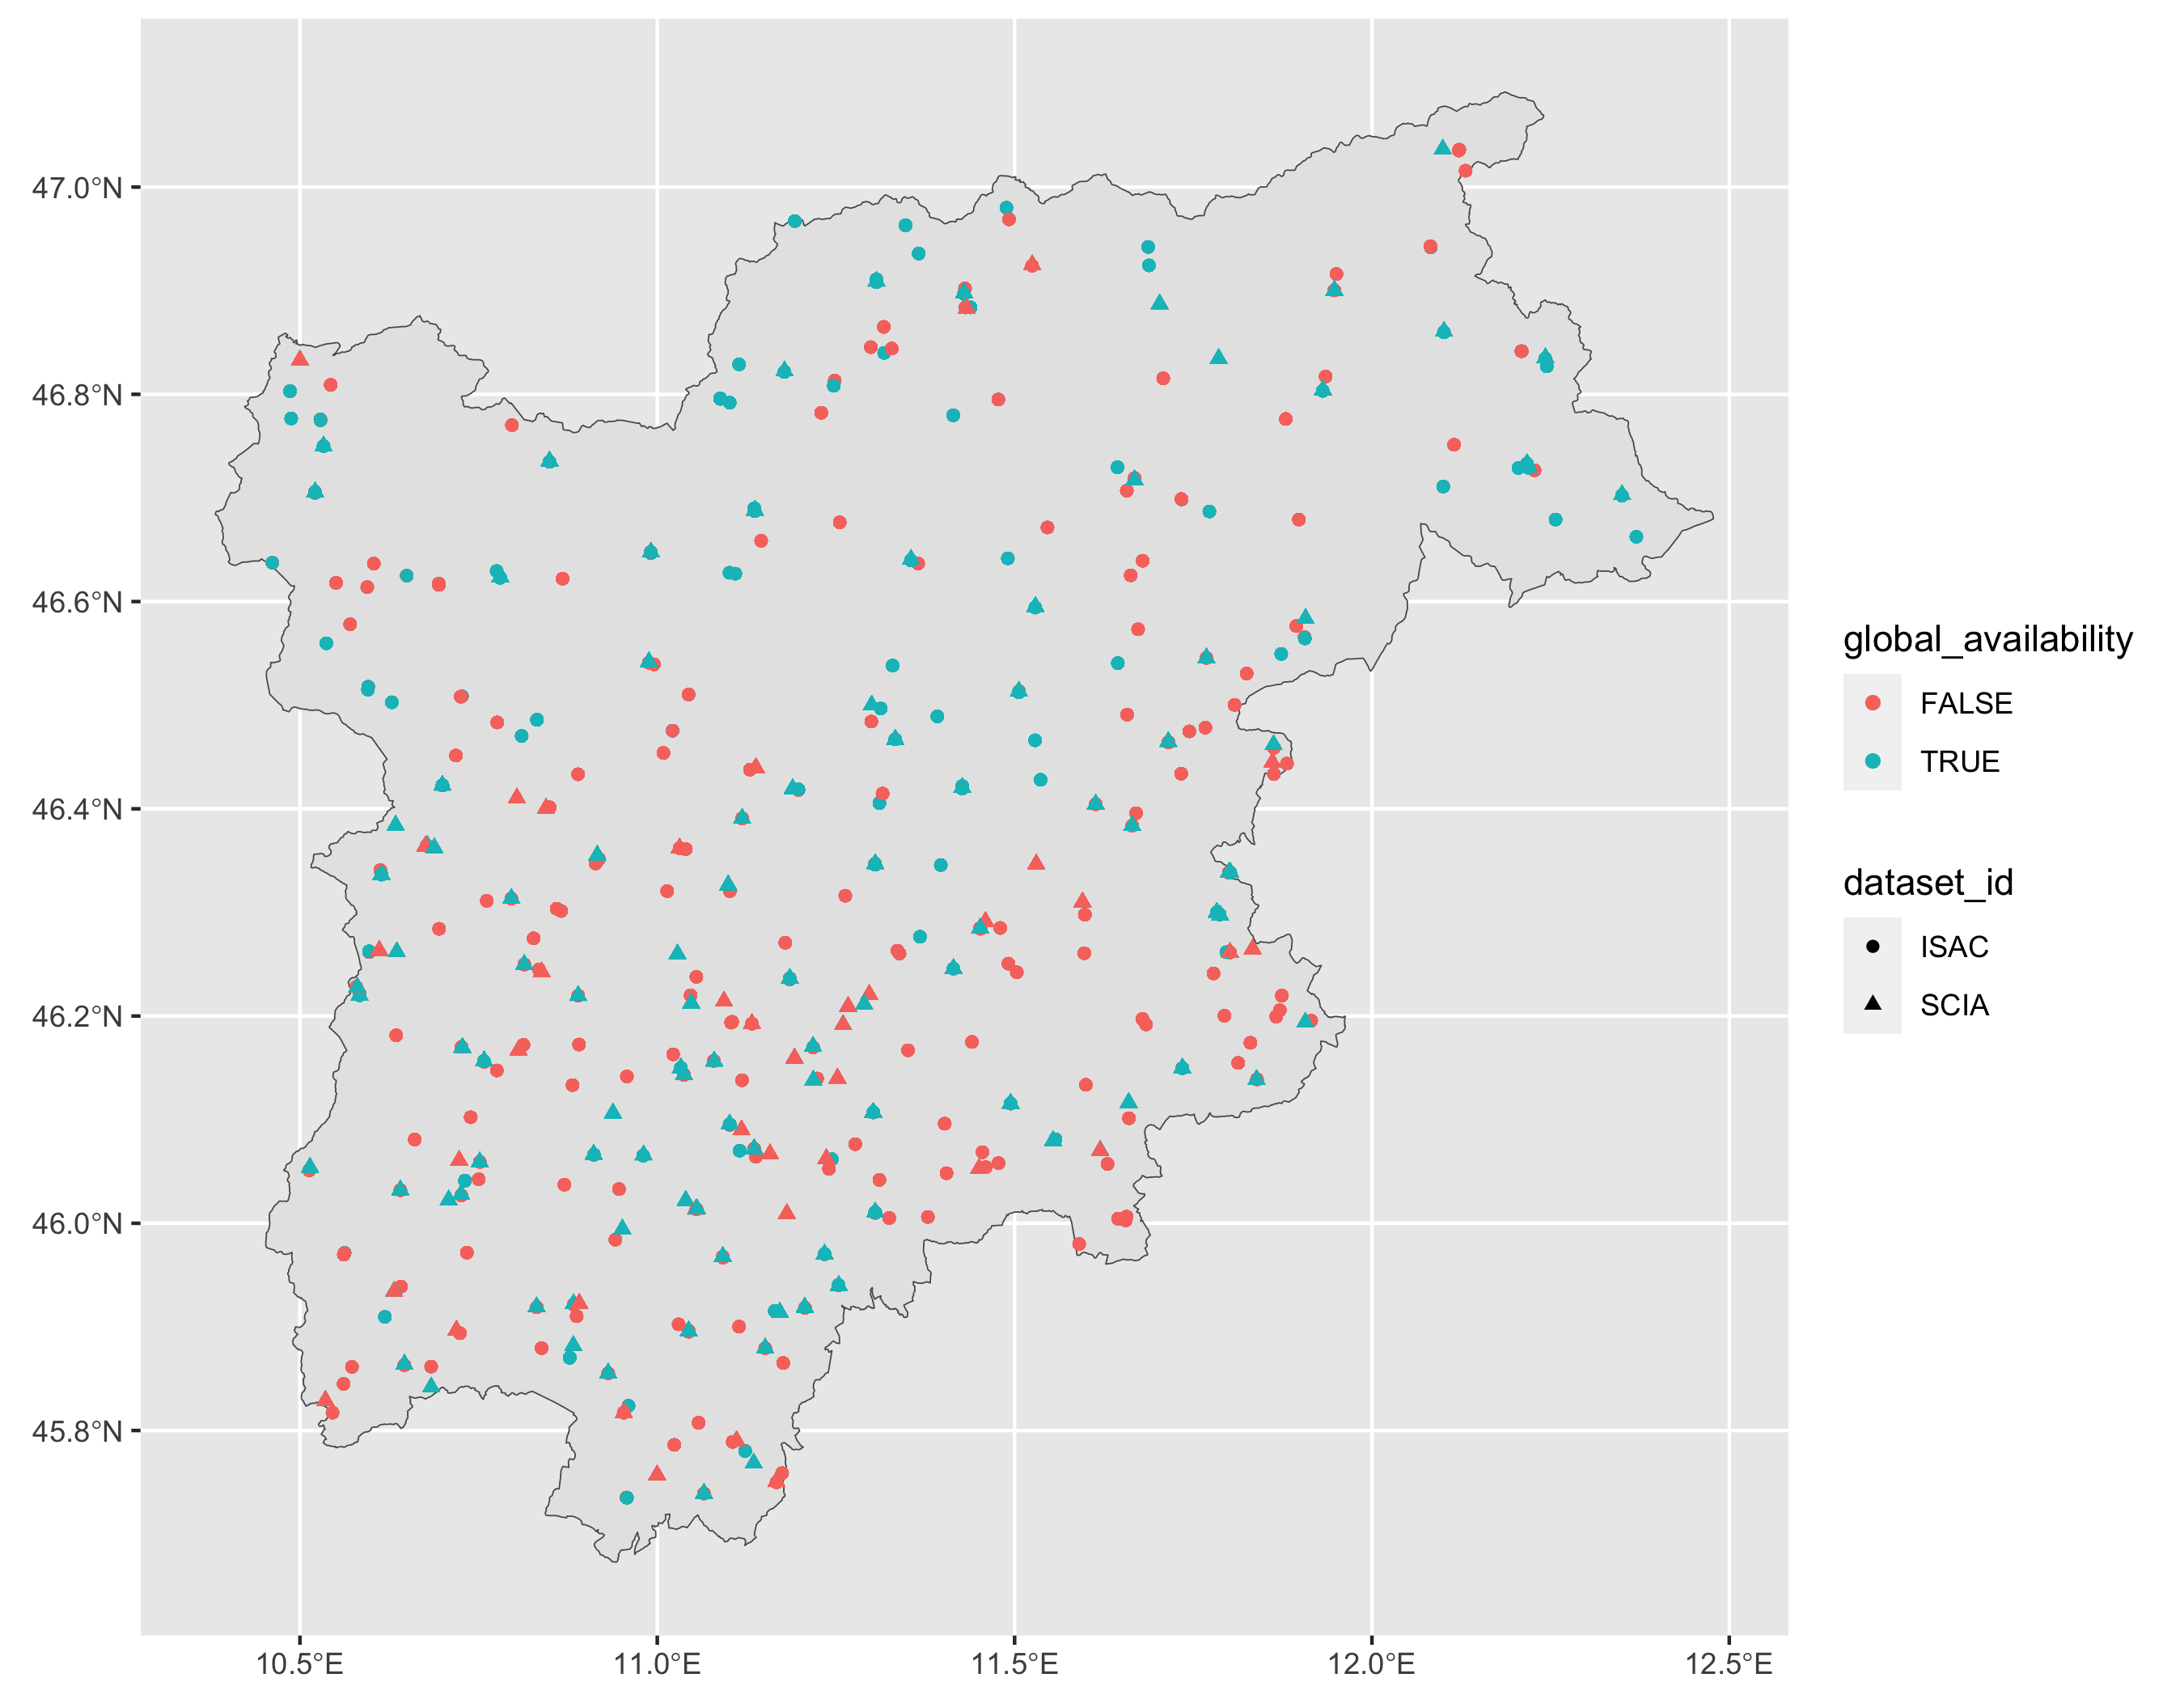

In [6]:
c(p, climats) %<-% spatial_availabilities(ymonthly_avail, qc_database$meta, state_boundaries)
p


In [ ]:
rm(qc_database)
rm(ymonthly_avail)
rm(climats)
rm(p)
gc()


## Merging
Gap-filling con altri dataset

### Match stazioni
Partendo dal file di analisi appena scritto preparo dei filtri che categorizzino il match.

Le possibilità sono:
- `tag_same_station`: il match indica una stessa stazione;
- `tag_unusable`: il match è inutilizzabile;
- `tag_pairable`: il match indica che le stazioni sono utilizzabili per fare gap-filling.

Può essere che un match sia sulla stessa stazione ma che sia inutilizzabile; `tag_unusable` e `tag_pairable` invece si dovrebbero escludere vicendevolmente.

In [ ]:
qc_state <- open_checkpoint(dataset_id, "qc1")
qc_scia <- open_checkpoint("SCIA", "qc1") |> filter_checkpoint_inside(state_boundaries)
analysis_results <- perform_analysis(
    qc_state,
    qc_scia,
    dist_km = , # 10,
    first_date,
    last_date,
    str_to_lower(state),
)

rm(qc_state)
rm(qc_scia)
gc()


In [ ]:
analysis_results <- tag_analysis(analysis_results, list("same_station" = tag_same_station, "unusable" = tag_unusable))
analysis_results$analysis |>
        group_by(same_station, unusable) |>
        tally()
filter(analysis_results$analysis, same_station) |>
        group_by(station_id.x) |>
        tally() |>
        filter(n != 2L & n != 4L)
filter(analysis_results$analysis, same_station) |>
        group_by(station_id.y) |>
        tally() |>
        filter(n != 2L)


In [ ]:
combination_results <- build_combined_database(analysis_results, use_corrections = TRUE, checks = TRUE, test_bounds = 1, match_selectors = NULL)
checkpoint_database(combination_results$database, dataset_id, "scia_merged")
save_match_list(combination_results$match_list, dataset_id, "scia_merged")


In [ ]:
combined_database <- open_checkpoint(dataset_id, "scia_merged")
c(p, ymonthly_avail) %<-% ymonthly_availabilities(combined_database,
    start_date = first_date,
    end_date = last_date
)
p


In [ ]:
c(p, climats) %<-% spatial_availabilities(ymonthly_avail, combined_database$meta, state_boundaries)
p


In [ ]:
rm(ymonthly_avail)
rm(climats)
rm(combination_results)
rm(combined_database)
gc()


### Merge interno

In [ ]:
scia_merged <- open_checkpoint(dataset_id, "scia_merged")
analysis_results <- perform_analysis_symmetric(
    scia_merged,
    dist_km = 6,
    first_date,
    last_date,
    file.path("vda", "internal.xlsx"),
    default_symmetric_filter,
    priority_table = NULL,
)

rm(scia_merged)
gc()


In [ ]:
analysis_results <- tag_analysis(analysis_results, list("same_station" = tag_same_station_internal, "unusable" = tag_unusable_internal))
analysis_results$analysis |>
        group_by(same_station, unusable) |>
        tally()
filter(analysis_results$analysis, same_station) |>
        group_by(station_id.x) |>
        tally() |>
        filter(n != 2L & n != 4L)
filter(analysis_results$analysis, same_station) |>
        group_by(station_id.y) |>
        tally() |>
        filter(n != 2L)


In [ ]:
combination_results <- build_combined_database(analysis_results, use_corrections = TRUE, checks = TRUE, test_bounds = 1.5, match_selectors = NULL)
checkpoint_database(combination_results$database, dataset_id, "merged")
save_match_list(combination_results$match_list, dataset_id, "merged")
rm(combination_results)
gc()


In [ ]:
combined_database <- open_checkpoint(dataset_id, "merged")
c(p, ymonthly_avail) %<-% ymonthly_availabilities(combined_database,
    start_date = first_date,
    end_date = last_date
)
p


In [ ]:
c(p, climats) %<-% spatial_availabilities(ymonthly_avail, combined_database$meta, state_boundaries)
p


In [ ]:
print("Available series per variable:")
climats |>
    as_tibble() |>
    group_by(variable, station_id) |>
    summarise(usable = all(clim_available), .groups = "drop_last") |>
    filter(usable) |>
    tally()


In [ ]:
rm(ymonthly_avail)
rm(climats)
rm(combined_database)
gc()


In [ ]:
source("notebooks/integrazioni_regionali/procedure/checkpoint.R")
open_checkpoint(dataset_id, "merged")$data |>
    distinct(station_id, variable) |>
    compute() |>
    nrow()


In [ ]:
# Lanciare da terminale
source("src/pairing/displaying.R")
source("notebooks/integrazioni_regionali/procedure/checkpoint.R")
open_checkpoint(, "merged") |>
    launch_leaflet()
